In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy 
import math
import matplotlib as mpl
from iminuit import Minuit

In [3]:
# Set som plotting standards:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)

# Set the background color of the plot to ghostwhite
axes = {'facecolor': 'ghostwhite'}
mpl.rc('axes', **axes)

# Set custom color cycle
custom_colors= ['dodgerblue', 'red', 'lightgreen', 'orange', 'orchid', 'navy']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)

# Set inside tickmarks
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

In [9]:
data1 = np.loadtxt('LLH_Ratio_2_data.txt')[:,0]
data2 = np.loadtxt('LLH_Ratio_2a_data.txt')[:,0]

In [10]:
print(min(data1), max(data1))
print(min(data2), max(data2))

-0.9999 0.9999
-1.0 0.9999


# Exercise 3 - from class 5

In [58]:
def func (x, alpha, beta):
    func = 1 + alpha * x + beta * x**2
    func /= scipy.integrate.trapz(func, x)
    return func

def log_llh(x, alpha, beta):
    model = func(np.sort(x), alpha, beta)
    log_llh = np.sum(np.log(model))
    return log_llh

def fit_obj1(alpha, beta):
    return -log_llh(data1, alpha, beta)

def fit_obj2(alpha, beta):
    return -log_llh(data2, alpha, beta)


In [59]:
initial_values = [0.47, 0.95]

minuit1 = Minuit(fit_obj1, *initial_values)
minuit1.migrad() 

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.343e+04                  │              Nfcn = 40               │
│ EDM = 5.26e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │   0.299   │   0.023   │            │            │         │         │       │
│ 1 │ beta  │   0.66    │   0.05    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │    alpha     beta │
├───────┼───────────────────┤
│ alpha │ 0.000529 0.000313 │
│  beta │ 0.000313  0.00261 │
└───────┴───────────────────┘

In [60]:
initial_values2 = [0., 0.5]

minuit2 = Minuit(fit_obj2, *initial_values2)
minuit2.migrad() 

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.365e+04                  │              Nfcn = 31               │
│ EDM = 8.24e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ alpha │  -0.043   │   0.022   │            │            │         │         │       │
│ 1 │ beta  │   0.58    │   0.05    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │    alpha     beta │
├───────┼───────────────────┤
│ alpha │ 0.000477  5.8e-05 │
│  beta │  5.8e-05  0.00246 │
└───────┴───────────────────┘

In [61]:
alpha_fit1 = minuit1.values[0]
beta_fit1 = minuit1.values[1]
alpha_fit_err1 = minuit1.errors[0]
beta_fit_err1 = minuit1.errors[1]

print('Data 1')
print(f'alpha = {alpha_fit1:.3f} +/- {alpha_fit_err1:.3f}')
print(f'beta = {beta_fit1:.3f} +/- {beta_fit_err1:.3f}')

Data 1
alpha = 0.299 +/- 0.023
beta = 0.662 +/- 0.051


In [62]:
alpha_fit2 = minuit2.values[0]
beta_fit2 = minuit2.values[1]
alpha_fit_err2 = minuit2.errors[0]
beta_fit_err2 = minuit2.errors[1]

print('Data 2')
print(f'alpha = {alpha_fit2:.3f} +/- {alpha_fit_err2:.3f}')
print(f'beta = {beta_fit2:.3f} +/- {beta_fit_err2:.3f}')

Data 2
alpha = -0.043 +/- 0.022
beta = 0.580 +/- 0.050


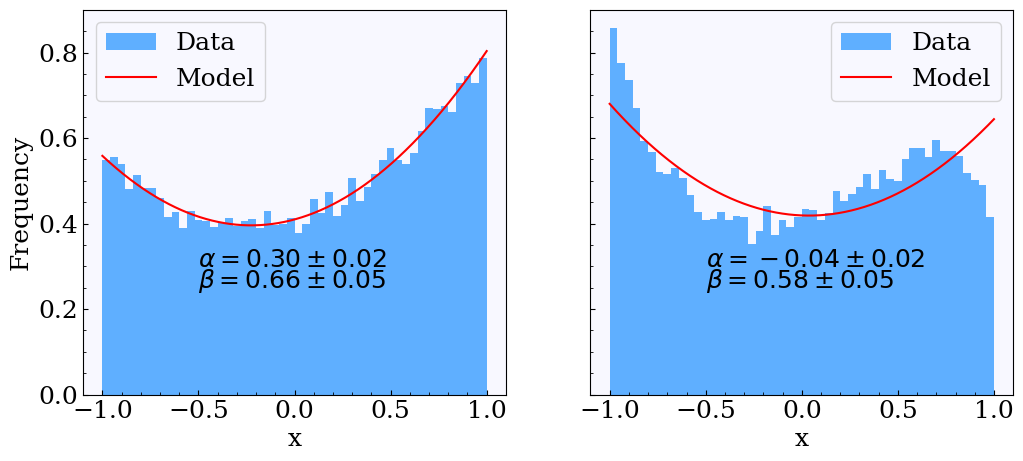

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

ax[0].hist(data1, bins=50, density=True, alpha=0.7, label='Data')
ax[0].plot(np.sort(data1), func(np.sort(data1), alpha_fit1, beta_fit1), label='Model')
ax[0].text(-0.5, 0.3, f'$\\alpha = {alpha_fit1:.2f} \\pm {alpha_fit_err1:.2f}$')
ax[0].text(-0.5, 0.25, f'$\\beta = {beta_fit1:.2f} \\pm {beta_fit_err1:.2f}$')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Frequency')
ax[0].legend()

ax[1].hist(data2, bins=50, density=True, alpha=0.7, label='Data')
ax[1].plot(np.sort(data2), func(np.sort(data2), alpha_fit2, beta_fit2), label='Model')
ax[1].text(-0.5, 0.3, f'$\\alpha = {alpha_fit2:.2f} \\pm {alpha_fit_err2:.2f}$')
ax[1].text(-0.5, 0.25, f'$\\beta = {beta_fit2:.2f} \\pm {beta_fit_err2:.2f}$')
ax[1].set_xlabel('x')
ax[1].legend()

In [64]:
# Binned likelihood fit 
from iminuit.util import make_func_code
from iminuit import describe

def get_chi2_values(minuit_obj, datapoints):
    
    for name in minuit_obj.parameters :
        value, error = minuit_obj.values[name], minuit_obj.errors[name]
        print(f"Fit value: {name} = {value:.5f} +/- {error:.5f}")
    
    chi2_value = minuit_obj.fval
    Ndof = datapoints - minuit_obj.nfit
    p_value = scipy.stats.chi2.sf(chi2_value, Ndof)
    
    print(f"Chi2 value: {chi2_value:.1f}   Ndof = {Ndof:.0f}    Prob(Chi2,Ndof) = {p_value:5.3f}")
    
    return chi2_value, Ndof, p_value

def set_var_if_None(var, x):
    if var is not None:
        return np.array(var)
    else: 
        return np.ones_like(x)
    
def compute_f(f, x, *par):
    
    try:
        return f(x, *par)
    except ValueError:
        return np.array([f(xi, *par) for xi in x])

class Chi2Regression:  # override the class with a better one
        
    def __init__(self, f, x, y, sy=None, weights=None, bound=None):
        
        if bound is not None:
            x = np.array(x)
            y = np.array(y)
            sy = np.array(sy)
            mask = (x >= bound[0]) & (x <= bound[1])
            x  = x[mask]
            y  = y[mask]
            sy = sy[mask]

        self.f = f  # model predicts y for given x
        self.x = np.array(x)
        self.y = np.array(y)
        
        self.sy = set_var_if_None(sy, self.x)
        self.weights = set_var_if_None(weights, self.x)
        self.func_code = make_func_code(describe(self.f)[1:])

    def __call__(self, *par):  # par are a variable number of model parameters
        
        # compute the function value
        f = compute_f(self.f, self.x, *par)
        
        # compute the chi2-value
        chi2 = np.sum(self.weights*(self.y - f)**2/self.sy**2)
        
        return chi2


def zerobin_hist(data, bins, xmin, xmax, ax=None): 
    '''Creating histogram without zero-bins'''
    counts, bin_edges = np.histogram(data, bins=bins, range=(xmin, xmax))
    
    mask = counts > 0 
    
    x_centers = (bin_edges[1:][mask] + bin_edges[:-1][mask])/2
    y = counts[mask]
    sy = np.sqrt(y)  # Assuming the bin count is Poisson distributed.
    
    if ax: 
        hist = ax.hist(data, bins=bins, range=(xmin, xmax), histtype='step', linewidth=2, color='red', label='Histogram of data')
        ax.errorbar(x_centers, y, yerr=sy, xerr=0.0, label='Poisson errors', 
                fmt='.k',  ecolor='k', elinewidth=1, capsize=1, capthick=1)
        ax.legend()
    
    return x_centers, y, sy


def chi2_test(data, bins, xmin, xmax, fit_pdf, *initial_values): 
    '''Performs Chi2-test on histogram without zerobins'''
    
    x, y, sy = zerobin_hist(data, bins, xmin, xmax)
    
    fit_obj = Chi2Regression(fit_pdf, x, y, sy)

    minuit = Minuit(fit_obj, *initial_values)
    minuit.errordef = 1.0     # This is the definition for ChiSqaure fits
    minuit.migrad()  
    
    return minuit

In [65]:
Nbins = 50 
xmin, xmax = -1, 1

hist1 = zerobin_hist(data1, Nbins, xmin, xmax)
hist2 = zerobin_hist(data2, Nbins, xmin, xmax)

minuit1 = chi2_test(data1, Nbins, xmin, xmax, func, *initial_values)
minuit2 = chi2_test(data2, Nbins, xmin, xmax, func, *initial_values2)

get_chi2_values(minuit1, Nbins)
get_chi2_values(minuit2, Nbins)

Fit value: alpha = 679.96902 +/- 28167.49518
Fit value: beta = 6116.50733 +/- 182846.23414
Chi2 value: 19947.0   Ndof = 48    Prob(Chi2,Ndof) = 0.000
Fit value: alpha = -332.72143 +/- 19949.08791
Fit value: beta = 5549.98682 +/- 165657.33166
Chi2 value: 19947.0   Ndof = 48    Prob(Chi2,Ndof) = 0.000


(19946.998124867565, 48, 0.0)

# Exercise 1

In [76]:
def null_hypothesis(x, rho, omega): 
    k = 1 / (2 + 2 * omega / 3)
    return k * (1 + rho * x + omega * x**2)

def alternative(x, rho, omega, gamma): 
    k = 1 / (2 + 2 * omega / 3)
    return k * (1 + rho * x + omega * x**2 - gamma * x**5)

def llh_0(x, rho, omega):
    model = null_hypothesis(x, rho, omega)
    llh = np.sum(np.log(model))
    return llh

def llh_1(x, rho, omega, gamma):
    model = alternative(x, rho, omega, gamma)
    llh = np.sum(np.log(model))
    return llh

In [77]:
def fit_obj_null1(rho, omega):
    return -llh_0(data1, rho, omega)

def fit_obj_null2(rho, omega):
    return -llh_0(data2, rho, omega)

def fit_obj_alt1(rho, omega, gamma):
    return -llh_1(data1, rho, omega, gamma)

def fit_obj_alt2(rho, omega, gamma):
    return -llh_1(data2, rho, omega, gamma)

In [78]:
initial_values_null1 = [0.47, 0.95]

minuit_null1 = Minuit(fit_obj_null1, *initial_values_null1)
minuit_null1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.343e+04                  │              Nfcn = 40               │
│ EDM = 4.22e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ rho   │   0.299   │   0.023   │            │            │         │         │       │
│ 1 │ omega │   0.66    │   0.05    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │      rho    omega │
├───────┼───────────────────┤
│   rho │ 0.000528 0.000313 │
│ omega │ 0.000313  0.00261 │
└───────┴───────────────────┘

In [79]:
initial_values_null2 = [0., 0.5]

minuit_null2 = Minuit(fit_obj_null2, *initial_values_null2)
minuit_null2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.365e+04                  │              Nfcn = 31               │
│ EDM = 7.23e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ rho   │  -0.043   │   0.022   │            │            │         │         │       │
│ 1 │ omega │   0.58    │   0.05    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │      rho    omega │
├───────┼───────────────────┤
│   rho │ 0.000477 5.77e-05 │
│ omega │ 5.77e-05  0.00246 │
└───────┴───────────────────┘

In [80]:
initial_values_alt1 = [0.47, 0.95, 0.1]

minuit_alt1 = Minuit(fit_obj_alt1, *initial_values_alt1)
minuit_alt1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.343e+04                  │              Nfcn = 68               │
│ EDM = 1.9e-06 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ rho   │   0.32    │   0.04    │            │            │         │         │       │
│ 1 │ omega │   0.66    │   0.05    │            │            │         │         │       │
│ 2 │ gamma │   0.06    │   0.08    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │       rho     omega     gamma │
├───────┼───────────────────────────────┤
│   rho │   0.00137  0.000182   0.00218 │
│ omega │  0.000182   0.00262 -0.000301 │
│ gamma │   0.00218 -0.000301   0.00563 │
└───────┴───────────────────────────────┘

In [81]:
initial_values_alt2 = [0.1, 0.5, 0.1]

minuit_alt2 = Minuit(fit_obj_alt2, *initial_values_alt2)
minuit_alt2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.35e+04                   │              Nfcn = 61               │
│ EDM = 6.01e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ rho   │   0.32    │   0.04    │            │            │         │         │       │
│ 1 │ omega │   0.59    │   0.05    │            │            │         │         │       │
│ 2 │ gamma │   0.92    │   0.08    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │      rho    omega    gamma │
├───────┼────────────────────────────┤
│   rho │  0.00133 0.000262  0.00219 │
│ omega │ 0.000262  0.00244  0.00103 │
│ gamma │  0.00219  0.00103  0.00564 │
└───────┴────────────────────────────┘

In [83]:
# Null hypothesis fit values for the two data sets 
rho_fit_null1 = minuit_null1.values[0]
omega_fit_null1 = minuit_null1.values[1]

rho_fit_null2 = minuit_null2.values[0]
omega_fit_null2 = minuit_null2.values[1]

# Alternative hypothesis fit values for the two data sets
rho_fit_alt1 = minuit_alt1.values[0]
omega_fit_alt1 = minuit_alt1.values[1]

rho_fit_alt2 = minuit_alt2.values[0]
omega_fit_alt2 = minuit_alt2.values[1]
gamma_fit_alt2 = minuit_alt2.values[2]

In [89]:
# print the fit values
print('Data 1')

print('Null hypothesis fit')
print(f'rho = {rho_fit_null1:.3f} +/- {minuit_null1.errors[0]:.3f}')
print(f'omega = {omega_fit_null1:.3f} +/- {minuit_null1.errors[1]:.3f}')

print('\nAlternative hypothesis fit')
print(f'rho = {rho_fit_alt1:.3f} +/- {minuit_alt1.errors[0]:.3f}')
print(f'omega = {omega_fit_alt1:.3f} +/- {minuit_alt1.errors[1]:.3f}')
print(f'gamma = {gamma_fit_alt2:.3f} +/- {minuit_alt2.errors[2]:.3f}')


print('\nData 2')
print('Null hypothesis fit')
print(f'rho = {rho_fit_null2:.3f} +/- {minuit_null2.errors[0]:.3f}')
print(f'omega = {omega_fit_null2:.3f} +/- {minuit_null2.errors[1]:.3f}')

print('\nAlternative hypothesis fit')
print(f'rho = {rho_fit_alt2:.3f} +/- {minuit_alt2.errors[0]:.3f}')
print(f'omega = {omega_fit_alt2:.3f} +/- {minuit_alt2.errors[1]:.3f}')
print(f'gamma = {gamma_fit_alt2:.3f} +/- {minuit_alt2.errors[2]:.3f}')


Data 1
Null hypothesis fit
rho = 0.299 +/- 0.023
omega = 0.661 +/- 0.051

Alternative hypothesis fit
rho = 0.324 +/- 0.037
omega = 0.657 +/- 0.051
gamma = 0.922 +/- 0.075

Data 2
Null hypothesis fit
rho = -0.043 +/- 0.022
omega = 0.580 +/- 0.050

Alternative hypothesis fit
rho = 0.318 +/- 0.036
omega = 0.588 +/- 0.049
gamma = 0.922 +/- 0.075


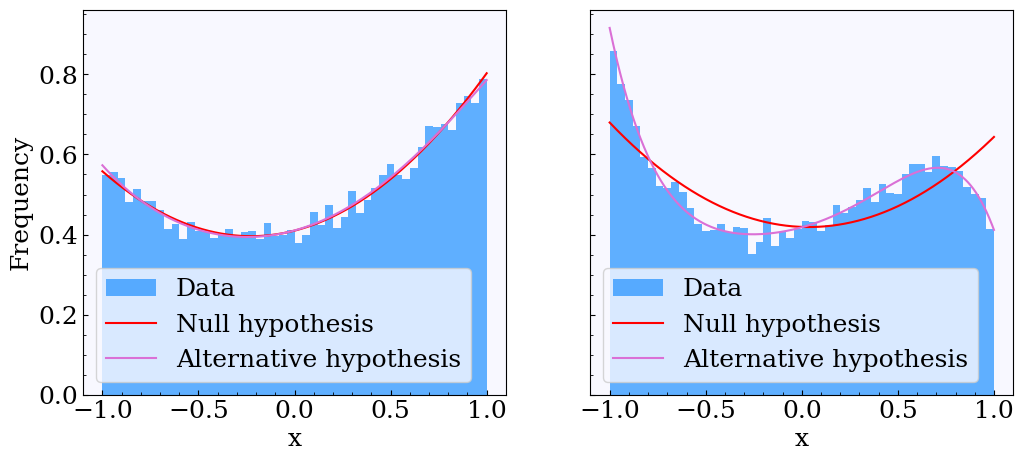

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

ax[0].hist(data1, bins=50, density=True, alpha=0.7, label='Data')
ax[0].plot(np.sort(data1), null_hypothesis(np.sort(data1), *minuit_null1.values), label='Null hypothesis')
ax[0].plot(np.sort(data1), alternative(np.sort(data1), *minuit_alt1.values), color='orchid', label='Alternative hypothesis')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Frequency')
ax[0].legend()

ax[1].hist(data2, bins=50, density=True, alpha=0.7, label='Data')
ax[1].plot(np.sort(data2), null_hypothesis(np.sort(data2), *minuit_null2.values), label='Null hypothesis')
ax[1].plot(np.sort(data2), alternative(np.sort(data2), *minuit_alt2.values), color='orchid', label='Alternative hypothesis')
ax[1].set_xlabel('x')
ax[1].legend()


In [95]:
# Calculate the likelihood ratio for data set 1

llh_null1 = llh_0(data1, *minuit_null1.values)
llh_alt1 = llh_1(data1, *minuit_alt1.values)

ratio1 = -2 * (llh_null1 - llh_alt1)

# Degree of freedom is the difference in the number of parameters
p_value1 = scipy.stats.chi2.sf(ratio1, 1)

print(f'Likelihood value for the null hypothesis for data set 1: {llh_null1:.3f}')
print(f'Likelihood value for the alternative hypothesis for data set 1: {llh_alt1:.3f}')
print(f'Likelihood ratio for data set 1: {ratio1:.3f}')
print(f'p-value for data set 1: {p_value1:.3f}')

Likelihood value for the null hypothesis for data set 1: -13432.140
Likelihood value for the alternative hypothesis for data set 1: -13431.405
Likelihood ratio for data set 1: 1.468
p-value for data set 1: 0.226


In [96]:
# Calculate the likelihood ratio for data set 2

llh_null2 = llh_0(data2, *minuit_null2.values)
llh_alt2 = llh_1(data2, *minuit_alt2.values)

ratio2 = -2 * (llh_null2 - llh_alt2)

# Degree of freedom is the difference in the number of parameters
p_value2 = scipy.stats.chi2.sf(ratio2, 1)

print(f'Likelihood value for the null hypothesis for data set 2: {llh_null2:.3f}')
print(f'Likelihood value for the alternative hypothesis for data set 2: {llh_alt2:.3f}')
print(f'Likelihood ratio for data set 2: {ratio2:.3f}')
print(f'p-value for data set 2: {p_value2:.3f}')

Likelihood value for the null hypothesis for data set 2: -13651.006
Likelihood value for the alternative hypothesis for data set 2: -13495.018
Likelihood ratio for data set 2: 311.976
p-value for data set 2: 0.000
